
**Hola! Manuel**

Mi nombre es Enrique Romero, tendre el gusto de revisar Tu proyecto, te deseo lo mejor.

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.



# Priorizando hipotesis

Junto con el departamento de marketing hemos recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

tenemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

In [1]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats


In [2]:
# lectura de archivos
hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv')

In [3]:
#muestra de tabla hypotheses_us
hypotheses_us

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


In [4]:
# ordenamos la informacion de la tabla para poder realizar el analisis de una forma mas clara
hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')

In [5]:
# mostramos la tabla ordenada
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente inicio, muy bien con esta exploración inicial
</div>	

# Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.
El ejercicio consiste en:

.- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

.- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

.- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [6]:
hypotheses_us['ICE'] = (hypotheses_us['Impact']*hypotheses_us['Confidence'])/hypotheses_us['Effort']
hypotheses_us[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Aplicando el framework ICE para priorizar hipotesis podemos ver que las mas prometedoras son 8, 0, 7, 6 y 2

In [7]:
hypotheses_us['RICE'] = (hypotheses_us['Reach']*hypotheses_us['Impact']*hypotheses_us['Confidence'])/hypotheses_us['Effort']
hypotheses_us[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Aplicando el framework RICE para priorizar hipotesis podemos ver que las mas prometedoras son similares al anterior pero con un orden diferente

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente trabajo, coincido con tus resultados    
</div>	

# Parte 2. Análisis de test A/B

 Algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

In [9]:
rep = orders.groupby(['visitorId'])['group'].nunique().sort_values(ascending=[False])
rep = rep[rep>1]

orders = orders[~orders['visitorId'].isin(rep)]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


El el analisis relizados pudimos ver que 181 visitiantes entraron tanto en el grupo A como en el B, los cuales eliminamos de la tabla orders para inciar con los siguientes analisis.

In [10]:
# pasamos al formato de fecha las columnas 'date' en ambos DataFrame
orders['date'] = pd.to_datetime(orders['date'], format= '%Y.%m.%d')
visitors['date'] = pd.to_datetime(visitors['date'], format= '%Y.%m.%d')

#### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736



<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente trabajo, coincido con tus resultados    
</div>	


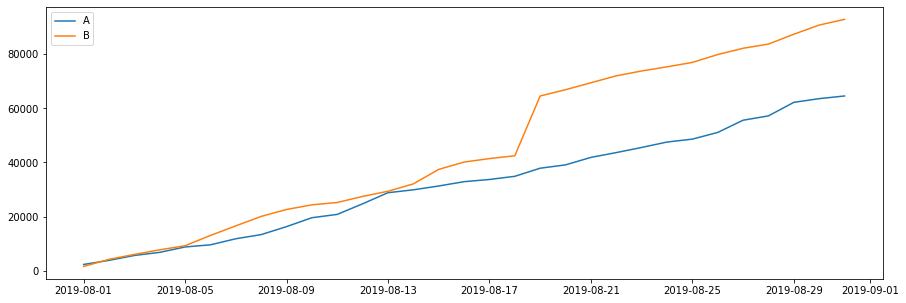

In [12]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.figure(figsize=[15,5])

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

En el grafico se puede obser que el ingreso acumulado por las compras de cada grupo se mantenia con cierta similitud hasta que a partir del 17-08-2019 el grupo B tomo ventaja significativa en los ingresos acumulados.

----------------------------------

#### Representa gráficamente el tamaño de pedido promedio acumtamulado por grupo. Haz conclusiones y conjeturas.

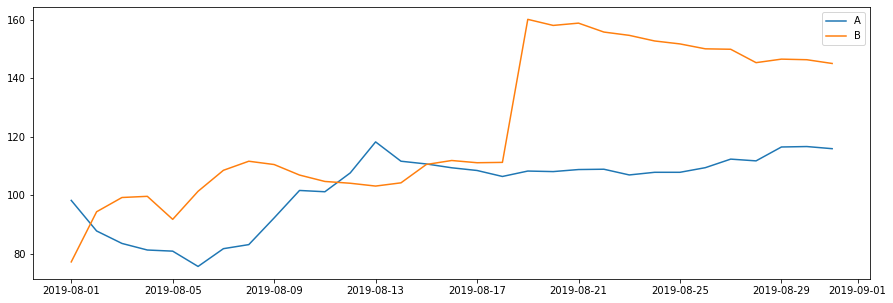

In [13]:
plt.figure(figsize=[15,5])
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='B',
)
plt.legend()
plt.show()

En la grafica podemos observar un aumento progresivo y en crecimiento para el grupo B destacandose para la fecha 17-08-2019 donde se aprecia un aumento considerable en los pedidos, mientras que para el grupo A observamos un leve decaimiento dentro de los primeros 5 dias recuperandose en los dias posteriores pero no lo suficiente para alcanzar a la cantidad de pedidos del grupo B

#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

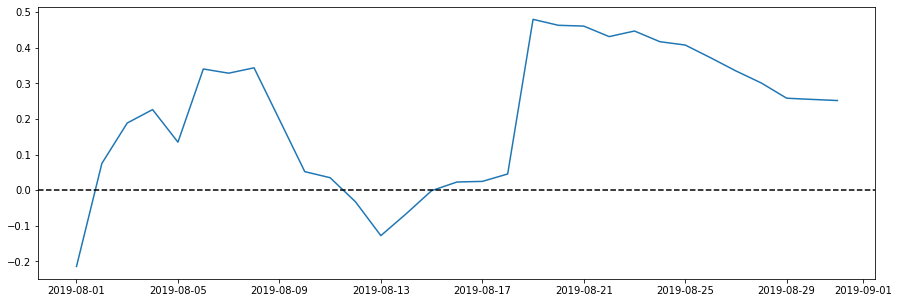

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)
plt.figure(figsize=[15,5])
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')


En la grafica podemos ver cambios repentinos y considerables, probablemente tenga que ver con compras anormalmente grandes.

#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

(18109.0, 18140.0, 0.0, 0.05)

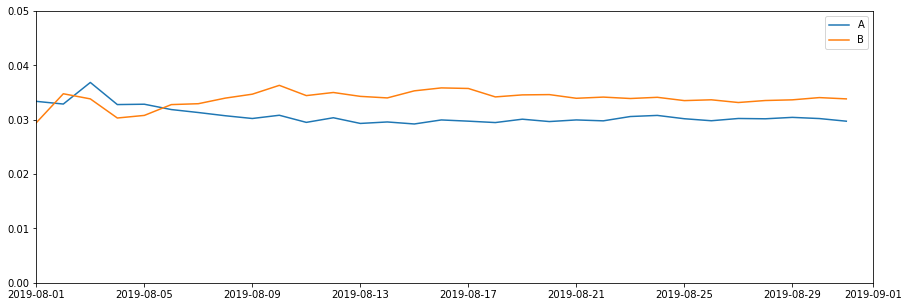

In [15]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=[15,5])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])

En este grafico podemos observar que al inicio de la prueba el grupo A tenia una tasa de converion mas alta pero de la fecha 05-08-2019 se observa un aumento en relacion al grupo A logrando tener ambos grupos una tasa de sonversion casi constante en el tiempo.

#### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


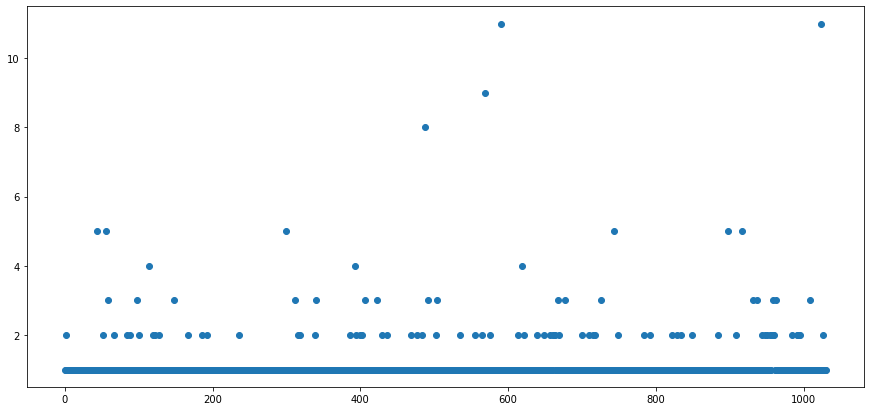

In [16]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=[15,7])
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

En el grafico mostrado podemos ver como solo 2 usuarios estan por encima de los 10 pedidos, observando que la mayor proporcion de usuarios genera menos de 2 compras.


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>    
Excelente trabajo, coincido con tus resultados    
</div>	


#### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [17]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


No mas del 5% de los usuarios relizaron 2 pedidos y y no mas del 1% realizaron 4 pedidos

#### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
873      2519737434  4256040402 2019-08-08    900.7     B
1029      469609643  2378935119 2019-08-10    900.7     A
60       1421016313  4256040402 2019-08-16    875.5     B


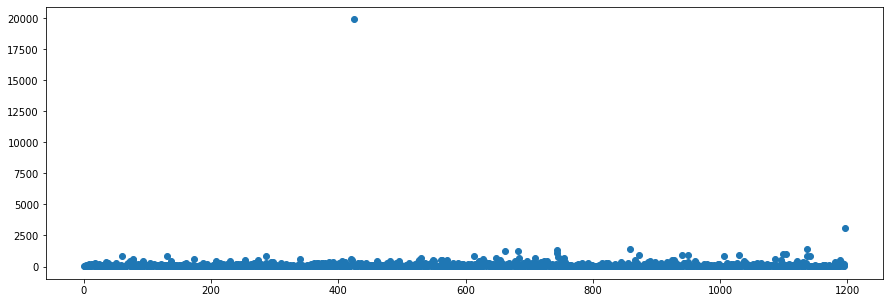

In [18]:
print(orders.sort_values(by='revenue',ascending=False).head(15))
plt.figure(figsize=[15,5])
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El desarrollo de esta sección depende mucho de todo el contenido previo del proyecto, principalmente ten en cuenta que es fundamental detectar los individuos que estén dentro de los dos grupos de experimento. </div>

En el grafico podemos ver que la mayoria de los pedidos estan muy por debajo de los 2500 de hecho segun el dataframe mostrado no sobrepasan los 1450.2 a diferencia de un usuario que hizo una compra de 3120.1 y una compra anomala de 19920.4

#### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía

In [19]:
np.percentile(orders['revenue'], [95, 99])


array([435.54 , 900.904])

No mas del 5% de los usuarios realizaron pedidos por encima de los 435  y no mas del 1% realizaron pedidos por encima de 900

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas

In [20]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.138


La ganancia de conversion relativa del grupo B en comparacion con el grupo A es del 13.8%, por lo tanto tiene diferencias significativas.

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [21]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]
    )
)
print(
    '{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1
    )
)

0.692
0.252


El valor de p es igual a 0.692 lo que es superior a 0.05 por lo que no existe estadisticamente diferencia significativa entre los tamaños del pedido promedio de los grupos, lo que si hay que tomar en cuenta es que la diferencia relativa esta por encima de 25%

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas

In [22]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 3000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers

18       199603092
23       237748145
37       249864742
68       457167155
68       611059232
146     1230306981
189     1614305549
425     1920142716
227     2038680547
1196    2108080724
237     2108163459
269     2378935119
278     2458001652
360     2587333274
382     2742574263
349     2988190573
424     3062433592
501     3717692402
514     3803269165
456     3908431265
467     3967698036
499     4256040402
dtype: int64

Usuarios que realizaron compras anomalas.

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [23]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01360
0.166


#### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 

1. Para la prueba, considera a uno de los grupos como líder. 

2. Para la prueba, concluye que no hay diferencia entre los grupos. 

3. Continúa la prueba.

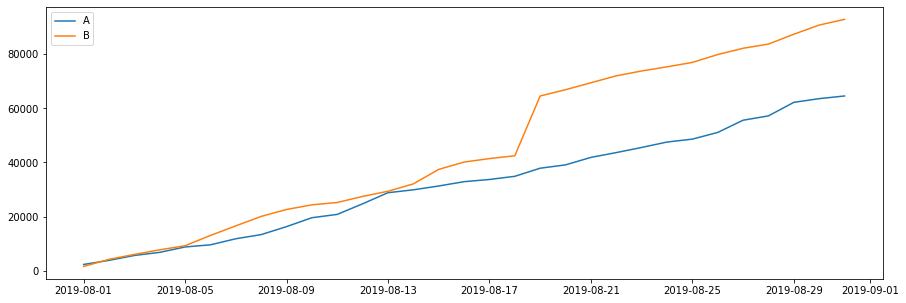

In [24]:
plt.figure(figsize=[15,5])

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

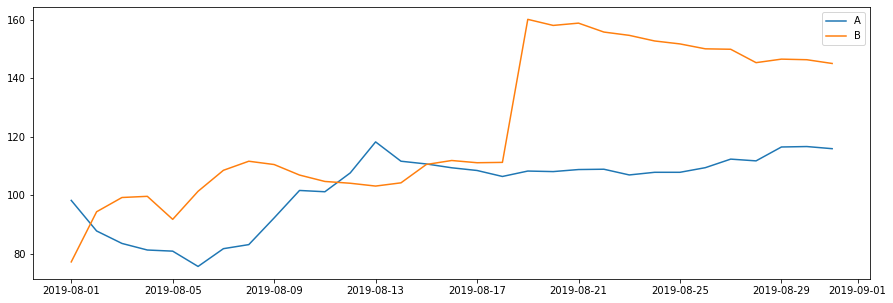

In [25]:
plt.figure(figsize=[15,5])
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='B',
)
plt.legend()
plt.show()

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Realice algunos cambion en la conclusion final tomando en cuenta los resultados obtenidos, en vez de argumentar que se puede explicar un resultado lo cambie de manera explicativa el porque se debe tomar la decision de parar la prueba.</div>

**Tomando en cuenta los 2 primeros graficos mostrados, que son ingreso acumulado y pedido promedio acumulado, podemos tomar la decision de _'Parar la prueba'_ ya que no existe una diferencia significativa entre los grupos sin embargo debido a una compra anomala realizada el 19-08-2019 por un monto de 19920.4 trae como consecuencia que el grupo B tome ventaja sobre el grupo A. de igual manera podemos asumir que el 95% de los usuarios realizan compras por debajo de los 435.**

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
El proyecto presenta algunas secciones incompletas o sin el total de conclusiones que permitan generar un buen orden, además los problemas al principio con el manejo de las tablas puede afectar todos los cálculos ejecutados; sin embargo, buen trabajo, debes trabajar expecialmente en la ultima conclusion. Quedaré atento para la siguiente revisión. </div>